<h2><center>ASSIGNMENT 2</center></h2>
<h3><center>Mounica Subramani</center></h3>

### Problem 1 [Linear regression]

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from numpy.linalg import inv

from statsmodels.regression.linear_model import OLS

from sklearn import warnings 

from scipy import stats

In [64]:
# read in data
KChouse_train = pd.read_csv('train.csv')
KChouse_test = pd.read_csv('test.csv')

# ignore the columns id, date, unnamed column as well as the categorical column zipcode.
KChouse_train = KChouse_train.drop(columns = ['zipcode','Unnamed: 0'])
KChouse_test = KChouse_test.drop(columns = ['id','zipcode','date','Unnamed: 0'])

In [65]:

KChouse_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [66]:
# correlation coefficients of features/variables
KChouse_train.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.704776
grade            0.647349
sqft_living15    0.645106
sqft_above       0.582407
bathrooms        0.487157
view             0.445316
sqft_basement    0.367365
lat              0.365770
waterfront       0.317143
bedrooms         0.307058
floors           0.239935
sqft_lot15       0.161746
sqft_lot         0.146645
yr_renovated     0.146348
condition        0.073961
long             0.032846
yr_built         0.016055
Name: price, dtype: float64

(a) Use an existing package to train a multiple linear regression model on the training set using all the
features (except the ones excluded above). Report the coefficients of the linear regression models and
the MSE metric on the training data

In [67]:
# Linear regression model
X_train = KChouse_train.drop(['price'], axis=1)
y_train = KChouse_train[['price']]

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
# print("X_train.shape:",X_train.shape)

Cross-validation scores: [0.67837004 0.70416297 0.6125577  0.72692348 0.55953864 0.79355793
 0.71355718 0.7597062  0.67484746 0.72691946]
Average cross-validation score: 0.70


In [68]:
model_fitted = model.fit(X_train, y_train)

In [69]:
predictions = model_fitted.predict(X_train)
# predictions

In [70]:
print("Mean squared error for train (unscaled) data:",mean_squared_error(y_train,predictions))

Mean squared error for train data: 31486167775.794888


(b) Perform feature standardization so that each feature (including the response) has mean 0 and variance
of 1. Train again a linear regression model on the training data and report the MSE on the training
data.

#### Scaling data so that each feature has mean 0 and standard deviation 1.

In [71]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(KChouse_train)
data_scaled_test = scaler.fit_transform(KChouse_test)

In [72]:
data_scaled

array([[-0.87974769, -0.40982347, -1.44988843, ..., -0.35519332,
        -0.96563661, -0.3128578 ],
       [ 0.05182493, -0.40982347,  0.28318404, ..., -0.7998304 ,
        -0.44332966, -0.23355563],
       [-1.00323042, -1.58410276, -1.44988843, ..., -0.18307573,
         1.09374507, -0.21669046],
       ...,
       [ 0.0975047 , -1.58410276, -1.44988843, ..., -0.86437449,
        -1.02532883, -0.4185143 ],
       [-0.97390696, -1.58410276, -1.44988843, ...,  1.07911986,
        -0.80148299, -0.40352304],
       [-0.68199849, -0.40982347, -0.06343045, ..., -0.46993837,
         0.39236146, -0.15736334]])

In [73]:
df = pd.DataFrame(data=data_scaled[:,0:],
                  index=data_scaled[:,0],
                  columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'])

In [74]:
df = df.reset_index(drop=True)
df.shape

(1000, 18)

In [75]:

X_train_scaled = df.drop(['price'], axis=1)
y_train_scaled = df[['price']]

model1 = LinearRegression()

scores = cross_val_score(model1, X_train_scaled, y_train_scaled, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
# X_train_scaled.columns

Cross-validation scores: [0.67837004 0.70416297 0.6125577  0.72692348 0.55953864 0.79355793
 0.71355718 0.7597062  0.67484746 0.72691946]
Average cross-validation score: 0.70


In [76]:
model_fitted1 = model1.fit(X_train_scaled, y_train_scaled)

In [77]:
predictions_scaled = model_fitted1.predict(X_train_scaled)
# predictions_scaled

In [78]:
model_fitted1.coef_


array([[-0.03690325,  0.05460245,  0.16724347,  0.03206976,  0.0237055 ,
         0.18785555,  0.14204967,  0.03820676,  0.27181372,  0.14231485,
         0.07997506, -0.19934981,  0.05090017,  0.23097972, -0.00305083,
         0.13432109, -0.03810604]])

In [79]:
print("Mean squared error for scaled train data:",mean_squared_error(y_train_scaled,predictions_scaled))

Mean squared error for scaled train data: 0.2734665681293983


(c) Evaluate both models on the testing set. Report the MSE on the testing set

##### Linear regression model on unscaled test data

In [80]:
X_test = KChouse_test.drop(['price'], axis=1)
y_test = KChouse_test[['price']]

model2 = LinearRegression()

scores = cross_val_score(model2, X_test, y_test, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.572243   0.7302379  0.4195207  0.69421544 0.58056117 0.64406129
 0.58310599 0.67480098 0.69470867 0.5749148 ]
Average cross-validation score: 0.62


In [81]:
model_fitted2 = model2.fit(X_test, y_test)

In [82]:
predictions2 = model_fitted2.predict(X_test)
# predictions

In [83]:
model_fitted2.coef_

array([[-5.09706680e+04,  4.53522145e+04,  1.29557364e+02,
         4.60107448e-01, -4.08290867e+03,  6.67916885e+05,
         6.41825495e+04,  3.74395531e+04,  8.69134817e+04,
         7.58952045e+01,  5.36621579e+01, -2.59297980e+03,
        -5.13466279e+00,  5.67370348e+05, -7.67745545e+04,
         3.41095820e+01, -8.48109171e-01]])

In [84]:
print("Mean squared error for non scaled test data:",mean_squared_error(y_test,predictions2))

Mean squared error for non scaled test data: 54185036855.79511


##### Linear regression on scaled test data

In [85]:
df_scaled = pd.DataFrame(data=data_scaled_test[1:,0:],
                  index=data_scaled_test[1:,0],
                  columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'])

df_scaled = df_scaled.reset_index(drop=True)

In [86]:
X_test_scaled = df_scaled.drop(['price'], axis=1)
y_test_scaled = df_scaled[['price']]

model3 = LinearRegression()

scores = cross_val_score(model3, X_test_scaled, y_test_scaled, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.61750399 0.72177335 0.41520807 0.69590594 0.58111104 0.63899562
 0.58430498 0.67685041 0.6919166  0.57445912]
Average cross-validation score: 0.62


In [87]:
model_fitted3 = model3.fit(X_test_scaled, y_test_scaled)

In [88]:
predictions_scaled1 = model_fitted3.predict(X_test_scaled)
# predictions_scaled1

In [89]:
model_fitted3.coef_

array([[-0.11656073,  0.08800974,  0.23817802,  0.0661224 , -0.00525078,
         0.1852539 ,  0.12709521,  0.06128675,  0.25616884,  0.21405969,
         0.08813423, -0.17705287, -0.00531226,  0.19009029, -0.02545619,
         0.05815344, -0.0584464 ]])

In [90]:
print("Mean squared error for scaled test data:",mean_squared_error(y_test_scaled,predictions_scaled1))

Mean squared errorfor scaled test data: 0.3253062062957616


(d) Interpret the results in your own words. Which features contribute mostly to the linear regression
model? Is the model fitting the data well? How large is the model error?

- Grade feature contributes mostly to the linear regression model. It has the highest coefficient value of 0.25616884.
- We din generalize the model well by taking all the features of the data into modelling.
- The model is fitting the data well and it is evident from the r-sqaured value calculated below as the difference between r squared calculated for training and testing has no much difference. 
- The error is not large and it is appropriate for the data used and the model as well.

In [91]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test_scaled, predictions_scaled1)
print("Rsquared error on testing data:",r2_test)

r2_train = r2_score(y_train_scaled,predictions_scaled)
print("Rsquared error on training data:",r2_train)

Rsquared error on testing data: 0.6749701848743102
Rsquared error on training data: 0.7265334318706018


### Problem 2 [Closed-form solution for linear regression]

(a) Implement simple linear regression using the closed form and train a model for one feature (sqft living)
using the training set. Write code to predict a response for a new single-dimensional data point in the
testing set.

#### Simple linear regression with one feature(sqft living)

In [92]:
# obtain the feature matrix 
KChouse_train1 = df.drop(columns = ['price'])
KChouse_test1 = df_scaled.drop(columns = ['price'])

X = KChouse_train1[['sqft_living15']]
X['ones'] = 1
X_test = KChouse_test1[['sqft_living15']]
X_test['ones'] = 1

# obtain the target variable 
y = df[['price']]
y_test = df_scaled[['price']]

# calculate coefficients using closed-form solution
coeffs_CF = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

y_prediction = X.dot(coeffs_CF)
y_test_prediction = X_test.dot(coeffs_CF)


C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
# extract the feature names into list

feature_names = list(X.columns)
feature_names

# convert list to array

features = np.asarray(feature_names)
features

# convert both the array vectors into dataframe
res = pd.DataFrame(coeffs_CF)

res1 = pd.DataFrame(features)

# merge dataframes
results = pd.merge(res1, res, left_index=True, right_index=True)
results = results.rename(columns={'0_x':'Features','0_y':'coeffs_CF'})

results

,Features,coeffs_CF
0,sqft_living15,6.451060e-01
1,ones,6.288373e-17


In [94]:
y_prediction.head()

,0
0,-0.622938
1,-0.285995
2,0.705582
3,-0.603684
4,-0.180098


In [95]:
y_test_prediction.head()

,0
0,-0.355080
1,-0.141438
2,-0.057839
3,-0.292845
4,-0.596589


In [96]:
print("Mean squared error for training data (simple Linear regression):",mean_squared_error(y,y_prediction))
print("Mean squared error for testing data (simple Linear regression):",mean_squared_error(y_test,y_test_prediction))

Mean squared error for training data: 0.5838382382385958
Mean squared error for testing data: 0.6764263056279269


(b) Implement the closed-from solution for multiple linear regression using matrix operations and train a
model on the training set. Write code to predict a response for a new multi-dimensional data point in
the testing set.

#### Multiple linear regression with all features

In [97]:
X1 = KChouse_train1
X1['ones'] = 1

X_test1 = KChouse_test1
X_test1['ones'] = 1

# obtain the target variable 
y1 = df[['price']]
y_test1 = df_scaled[['price']]

# calculate coefficients using closed-form solution
coeffs_CF_1 = inv(X1.transpose().dot(X1)).dot(X1.transpose()).dot(y1)

y_prediction1 = X1.dot(coeffs_CF_1)
y_test_prediction1 = X_test1.dot(coeffs_CF_1)


In [98]:
# extract the feature names into list

feature_names1 = list(X1.columns)
# print(feature_names1)

# convert list to array

features1 = np.asarray(feature_names1)
# print(features1)

# convert both the array vectors into dataframe
res2 = pd.DataFrame(coeffs_CF_1)

res3 = pd.DataFrame(features1)

# merge dataframes
results1 = pd.merge(res2, res3, left_index=True, right_index=True)
results1 = results1.rename(columns={'0_x':'Features','0_y':'coeffs_CF'})

results1

,Features,coeffs_CF
0,1.819630e-02,bedrooms
1,2.082002e-01,bathrooms
2,-5.465047e-01,sqft_living
3,1.959751e-02,sqft_lot
4,1.108606e-02,floors
5,1.888729e-01,waterfront
6,1.634773e-01,view
7,4.165114e-02,condition
8,2.387074e-01,grade
9,8.340260e-01,sqft_above


In [99]:
y_prediction1.head()

,0
0,-0.979190
1,0.658167
2,-0.586131
3,-0.085220
4,-0.232246


In [100]:
y_test_prediction1.head()

,0
0,-0.766049
1,-0.971737
2,0.011118
3,-1.221909
4,-0.026984


(c) Compare the models given by your implementation with those trained in Problem 1 by the R or Python
packages. Report the MSE metrics for the models you implemented on both training and testing sets

- The package generated linear regression model has appropriate mean squared error value just right for the data used.
- The implemented model's mean squared error values a bit high than package model, but the difference is quite neglegible.

##### MSE for Python package used models

In [101]:
print("Mean squared error for scaled train data:",mean_squared_error(y_train_scaled,predictions_scaled))
print("Mean squared errorfor scaled test data:",mean_squared_error(y_test_scaled,predictions_scaled1))

Mean squared error for scaled train data: 0.2734665681293983
Mean squared errorfor scaled test data: 0.3253062062957616


##### MSE for implemented model

In [102]:
print("Mean squared error for training data:",mean_squared_error(y1,y_prediction1))
print("Mean squared error for testing data:",mean_squared_error(y_test1,y_test_prediction1))

Mean squared error for training data: 0.31194738550839385
Mean squared error for testing data: 0.37329326533579754


### Problem 3 [Gradient descent]

In [103]:
X2 = KChouse_train1
X2['ones'] = 1

X_test2 = KChouse_test1
X_test2['ones'] = 1

# obtain the target variable 
y2 = df[['price']]
y_test2 = df_scaled[['price']]


(a) Write code for gradient descent for training linear regression using the algorithm from class

In [104]:
def gradient_descent1(X,y,theta,alpha,n):
    
    m = len(y)
        
    for i in range(n):
        prediction = np.dot(X,theta)
        
        theta = theta - (1/m) * alpha * (X.T.dot(prediction - y))
        
    return theta

(b) Vary the value of the learning rate (3 different values) and report the value of θ after different number
of iterations (10, 50, and 100). Include the MSE metric on the training and testing set for all values of
θ and number of iterations.

In [105]:
# np.random.seed(2)
alpha = 0.01
iter = [10,50,100]
cols = KChouse_train1.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent1(X2,y2,theta_df,alpha,i)
    y_test_pred_gd = X_test2.dot(theta_j)
    print("mean squared error on scaled test data (GD):",mean_squared_error(y_test2,y_test_pred_gd))

mean squared error on scaled test data: 17.464163451221626
mean squared error on scaled test data: 6.97958920199715
mean squared error on scaled test data: 3.445182931877422


In [106]:
alpha = 0.1
iter = [10,50,100]
cols = KChouse_train1.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent1(X2,y2,theta_df,alpha,i)
    y_test_pred_gd = X_test2.dot(theta_j)
    print("mean squared error on scaled test data (GD):",mean_squared_error(y_test2,y_test_pred_gd))

mean squared error on scaled test data: 1.413135824269324
mean squared error on scaled test data: 0.361498220452008
mean squared error on scaled test data: 0.34150739669043473


In [107]:
alpha = 0.2
iter = [10,50,100]
cols = KChouse_train1.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent1(X2,y2,theta_df,alpha,i)
    y_test_pred_gd = X_test2.dot(theta_j)
    print("mean squared error on scaled test data (GD):",mean_squared_error(y_test2,y_test_pred_gd))

mean squared error on scaled test data: 1.5245356316084024
mean squared error on scaled test data: 0.3824370082195767
mean squared error on scaled test data: 0.3449699649933864


In [115]:
alpha = 0.1
iter = [10,50,100,200,300,400,500,600,700,800,900,1000]
cols = KChouse_train1.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent1(X2,y2,theta_df,alpha,i)
    y_test_pred_gd = X_test2.dot(theta_j)
    print("mean squared error on scaled test data (GD):",mean_squared_error(y_test2,y_test_pred_gd))

mean squared error on scaled test data: 1.8160006493541812
mean squared error on scaled test data: 0.40963304455213345
mean squared error on scaled test data: 0.3573510297650286
mean squared error on scaled test data: 0.34246820956709867
mean squared error on scaled test data: 0.3409119071387248
mean squared error on scaled test data: 0.3406447292674675
mean squared error on scaled test data: 0.3405909841654776
mean squared error on scaled test data: 0.34057982865194064
mean squared error on scaled test data: 0.34057750551290006
mean squared error on scaled test data: 0.34057702248141386
mean squared error on scaled test data: 0.34057692224133757
mean squared error on scaled test data: 0.3405769014708617


### Problem 4

(a) Write the derivation of the closed form solution for parameter θ that minimizes the loss function J(θ)
in ridge regression.

- In paper format at the end of the pdf

(b) Modify your linear regression implementation from Problem 2 to handle ridge regression. Take several values of the regularization parameter λ and output the MSE metric. Plot the value of MSE as a
function of λ. What is the best value of λ that you found? Compare the results of linear regression
and ridge regression on the dataset.

In [116]:
I = np.identity(18)
lamda = []
MSE = []

# derivation of the closed form solution for parameter θ that minimizes the loss function J(θ) in ridge regression

for lamda_i in range(0,10000,20):
    lamda.append(lamda_i)
    coeffs_CF_2 = inv(X1.transpose().dot(X1) + lamda_i * I).dot(X1.transpose()).dot(y1)   
    # Y prediction values for training data
    y_prediction1_rg = X1.dot(coeffs_CF_2)
    # y predictiom values for testing data
    y_test_prediction1_rg = X_test1.dot(coeffs_CF_2)
    
    mean_error = mean_squared_error(y1,y_prediction1_rg)
    mean_error_test = mean_squared_error(y_test1,y_test_prediction1_rg)
    
    print("Mean squared error for training data (ridge):",mean_squared_error(y1,y_prediction1_rg))    
    print("Mean squared error for testing data (ridge):",mean_squared_error(y_test1,y_test_prediction1_rg))
    print("\n")
    MSE.append(mean_error_test)

Mean squared error for training data (ridge): 0.31194738550839385
Mean squared error for testing data (ridge): 0.37329326533579754


Mean squared error for training data (ridge): 0.27357928858440955
Mean squared error for testing data (ridge): 0.3402268155372297


Mean squared error for training data (ridge): 0.27387872101234956
Mean squared error for testing data (ridge): 0.34027999083813976


Mean squared error for training data (ridge): 0.2743231393764978
Mean squared error for testing data (ridge): 0.3404495886233099


Mean squared error for training data (ridge): 0.2748848144849361
Mean squared error for testing data (ridge): 0.34071532960019146


Mean squared error for training data (ridge): 0.27554425161640084
Mean squared error for testing data (ridge): 0.3410631869726186


Mean squared error for training data (ridge): 0.2762870722453272
Mean squared error for testing data (ridge): 0.34148287414599043


Mean squared error for training data (ridge): 0.277102234053876
Mean square

Mean squared error for training data (ridge): 0.3654963359953668
Mean squared error for testing data (ridge): 0.41259302313900115


Mean squared error for training data (ridge): 0.3668763033123738
Mean squared error for testing data (ridge): 0.41377983922191847


Mean squared error for training data (ridge): 0.36825221073640374
Mean squared error for testing data (ridge): 0.4149644044314494


Mean squared error for training data (ridge): 0.3696240138350016
Mean squared error for testing data (ridge): 0.4161466480432525


Mean squared error for training data (ridge): 0.37099167139083034
Mean squared error for testing data (ridge): 0.4173265030175461


Mean squared error for training data (ridge): 0.3723551452357748
Mean squared error for testing data (ridge): 0.41850390582623337


Mean squared error for training data (ridge): 0.3737144000942155
Mean squared error for testing data (ridge): 0.41967879628902605


Mean squared error for training data (ridge): 0.3750694034349027
Mean squared

Mean squared error for training data (ridge): 0.44939278330063986
Mean squared error for testing data (ridge): 0.4864675095331373


Mean squared error for training data (ridge): 0.4504788377380756
Mean squared error for testing data (ridge): 0.4874414671153946


Mean squared error for training data (ridge): 0.4515609073299609
Mean squared error for testing data (ridge): 0.48841220003813685


Mean squared error for training data (ridge): 0.45263900872845286
Mean squared error for testing data (ridge): 0.48937971669591385


Mean squared error for training data (ridge): 0.4537131586354573
Mean squared error for testing data (ridge): 0.4903440256567011


Mean squared error for training data (ridge): 0.45478337379656214
Mean squared error for testing data (ridge): 0.4913051356535101


Mean squared error for training data (ridge): 0.4558496709952377
Mean squared error for testing data (ridge): 0.49226305557631667


Mean squared error for training data (ridge): 0.4569120670472951
Mean squared

Mean squared error for training data (ridge): 0.510693517430723
Mean squared error for testing data (ridge): 0.5419230979515659


Mean squared error for training data (ridge): 0.5115607312205411
Mean squared error for testing data (ridge): 0.5427137965095649


Mean squared error for training data (ridge): 0.5124249698811213
Mean squared error for testing data (ridge): 0.5435019326538252


Mean squared error for training data (ridge): 0.51328624763267
Mean squared error for testing data (ridge): 0.544287517067507


Mean squared error for training data (ridge): 0.5141445786244179
Mean squared error for testing data (ridge): 0.5450705604048847


Mean squared error for training data (ridge): 0.5149999769345697
Mean squared error for testing data (ridge): 0.5458510732906541


Mean squared error for training data (ridge): 0.5158524565702673
Mean squared error for testing data (ridge): 0.5466290663192668


Mean squared error for training data (ridge): 0.5167020314675743
Mean squared error for

Mean squared error for testing data (ridge): 0.5897196860158405


Mean squared error for training data (ridge): 0.5635424931888443
Mean squared error for testing data (ridge): 0.5903606246107564


Mean squared error for training data (ridge): 0.5642363243111322
Mean squared error for testing data (ridge): 0.5909996356220701


Mean squared error for training data (ridge): 0.5649279925010948
Mean squared error for testing data (ridge): 0.5916367271842626


Mean squared error for training data (ridge): 0.5656175075536257
Mean squared error for testing data (ridge): 0.5922719073929122


Mean squared error for training data (ridge): 0.5663048792084091
Mean squared error for testing data (ridge): 0.5929051843048077


Mean squared error for training data (ridge): 0.5669901171502391
Mean squared error for testing data (ridge): 0.5935365659380615


Mean squared error for training data (ridge): 0.5676732310093384
Mean squared error for testing data (ridge): 0.5941660602722302


Mean squared erro

Mean squared error for testing data (ridge): 0.6319080992349179


Mean squared error for training data (ridge): 0.60906172350005
Mean squared error for testing data (ridge): 0.6324274296853558


Mean squared error for training data (ridge): 0.6096203002501911
Mean squared error for testing data (ridge): 0.6329453327819297


Mean squared error for training data (ridge): 0.6101773027171292
Mean squared error for testing data (ridge): 0.6334618141958835


Mean squared error for training data (ridge): 0.610732737434742
Mean squared error for testing data (ridge): 0.633976879570378


Mean squared error for training data (ridge): 0.6112866109018148
Mean squared error for testing data (ridge): 0.6344905345206404


Mean squared error for training data (ridge): 0.6118389295822619
Mean squared error for testing data (ridge): 0.6350027846341112


Mean squared error for training data (ridge): 0.6123896999053482
Mean squared error for testing data (ridge): 0.6355136354705926


Mean squared error fo

Mean squared error for training data (ridge): 0.6414175120155248
Mean squared error for testing data (ridge): 0.6624872373338729


Mean squared error for training data (ridge): 0.6418883984746119
Mean squared error for testing data (ridge): 0.6629255704265765


Mean squared error for training data (ridge): 0.642358061745195
Mean squared error for testing data (ridge): 0.6633627883366927


Mean squared error for training data (ridge): 0.6428265065302173
Mean squared error for testing data (ridge): 0.6637988952134012


Mean squared error for training data (ridge): 0.6432937375089548
Mean squared error for testing data (ridge): 0.6642338951861045


Mean squared error for training data (ridge): 0.6437597593371607
Mean squared error for testing data (ridge): 0.6646677923645393


Mean squared error for training data (ridge): 0.644224576647208
Mean squared error for testing data (ridge): 0.6651005908388834


Mean squared error for training data (ridge): 0.644688194048234
Mean squared error fo

Mean squared error for testing data (ridge): 0.6925254938058414


Mean squared error for training data (ridge): 0.674021512889178
Mean squared error for testing data (ridge): 0.6928904896874606


Mean squared error for training data (ridge): 0.6744113449220028
Mean squared error for testing data (ridge): 0.6932546333811017


Mean squared error for training data (ridge): 0.6748002527333233
Mean squared error for testing data (ridge): 0.6936179278179246


Mean squared error for training data (ridge): 0.6751882395771804
Mean squared error for testing data (ridge): 0.6939803759159847


Mean squared error for training data (ridge): 0.6755753086925265
Mean squared error for testing data (ridge): 0.6943419805803028


Mean squared error for training data (ridge): 0.6759614633033115
Mean squared error for testing data (ridge): 0.6947027447029339


Mean squared error for training data (ridge): 0.6763467066185689
Mean squared error for testing data (ridge): 0.695062671163039


Mean squared error 

In [110]:
# convert list to array

Lamda = np.asarray(lamda)
MSE_df = np.asarray(MSE)
# print(features1)

# convert both the array vectors into dataframe
res_1 = pd.DataFrame(Lamda)

res_2 = pd.DataFrame(MSE_df)

# merge dataframes
result_df = pd.merge(res_1, res_2, left_index=True, right_index=True)
result_df = result_df.rename(columns={'0_x':'Lamda','0_y':'MSE'})

result_df.head()

,Lamda,MSE
0,0,0.373293
1,20,0.340227
2,40,0.340280
3,60,0.340450
4,80,0.340715


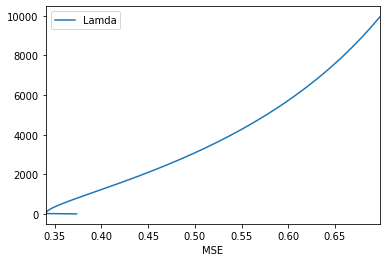

In [111]:
result_df.plot.line(x='MSE', y='Lamda')

In [117]:
print("Mean squared error for scaled train data:",mean_squared_error(y_train_scaled,predictions_scaled))
print("Mean squared errorfor scaled test data:",mean_squared_error(y_test_scaled,predictions_scaled1))

Mean squared error for scaled train data: 0.2734665681293983
Mean squared errorfor scaled test data: 0.3253062062957616


- The best value for lambda is 1, below are the MSE values for lamba = 1.

######  Ridge regression MSE
- Mean squared error for training data (ridge): 0.27357928858440955
- Mean squared error for testing data (ridge): 0.3402268155372297

###### package based linear regression MSE
- Mean squared error for scaled train data: 0.2734665681293983
- Mean squared errorfor scaled test data: 0.3253062062957616

There is no much difference in MSE values of rigde and linear regression.

### Problem 5 [Dependent features in linear regression]

- In paper format at the end of the pdf

### Problem 6 [Laplace noise in MLE estimate]

(a) Plot the Laplace pdf for b ∈ {1, 2, 4}. How is the Laplace distribution different from the normal
distribution?

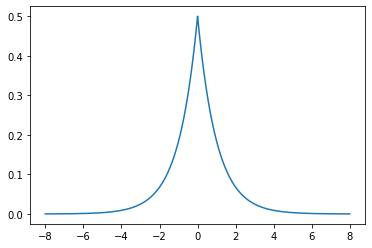

In [112]:
loc, scale = 0., 1.
x_lap = np.random.laplace(loc, scale, 1000)

x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, pdf)

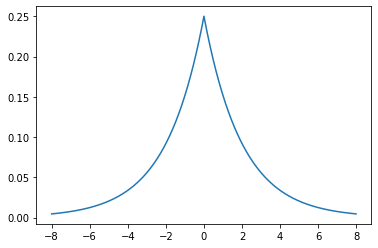

In [113]:
loc, scale = 0., 2.
x_lap = np.random.laplace(loc, scale, 1000)

x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, pdf)

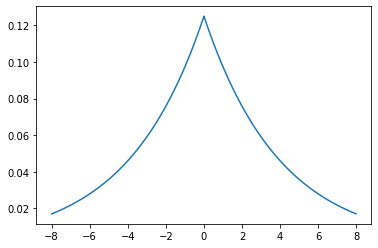

In [114]:
loc, scale = 0., 4.
x_lap = np.random.laplace(loc, scale, 1000)

x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, pdf)

(b) Derive the objective J(θ) that maximizes the MLE for Laplace noise. The objective should depend
on θ, the training dataset (xi, yi), for i ∈ {1, . . . , N}, and b.

- In paper format at the end of the pdf

(c) Consider an outlier in the training data, defined as a point of high residual. Which of the two objectives
(derived for normal or Laplace noise) are more resilient to the effect of outliers?

- The pdf of laplace distribution is (1/2b)*e^(-x/b) and the MLE is 1.
- The pdf of normal distribution is (1/sqrt(2pi))*e^(x^2/b) and the MLE is 2x.
- The normal distribution is more vulnerable to outliers.
- Therefore, laplace noise is more resilient to the effect of outliers.